<a href="https://colab.research.google.com/github/Attent1/CP2-IA/blob/main/CP2-IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DICIONARIO**


totalAtivo - O ativo total de uma empresa é a soma de todos os seus ativos, ou seja, seus bens e direitos. Dessa forma, inclui o ativo circulante, realizável a longo prazo e permanente, também chamado de não circulante. A definição de ativo na contabilidade é o conjunto de bens e direitos da organização.



In [ ]:
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Bibliotecas para uso e visualização de dados
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import para divisão dos dados de treino e teste
from sklearn.model_selection import train_test_split

# Imports para preparação de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Import de métricas para avaliação dos modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [173]:
url = "/content/drive/MyDrive/solicitacoescredito.csv"
df = pd.read_csv(url)
df_sub = df[["margemBruta",  "faturamentoBruto", "duplicatasAReceber", "estoque", "totalAtivo", "passivoCirculante", "ativoCirculante"]]
df_sub.shape

(8973, 7)

In [174]:
df_sub.head()

,margemBruta,faturamentoBruto,duplicatasAReceber,estoque,totalAtivo,passivoCirculante,ativoCirculante
0,0.0,1766880.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2814940.0,NaN,NaN,NaN,NaN,NaN
3,0.0,1285274.0,NaN,NaN,NaN,NaN,NaN
4,81459809.0,40779757.0,11797928.0,3047791.0,25793410.0,12149031.0,14758917.0


In [175]:
df = df_sub.interpolate()

In [180]:
df.shape

(8973, 7)

In [181]:
#Filtrando registros com valores negativos nas colunas ativoCirculante e margemBruta
linhas_totalAtivo_margemBruta_faturamentoBruto = df[(df['totalAtivo'] >= 0) & (df['margemBruta'] >= 0)]
print("Colunas onde 'totalAtivo e margemBruta' é maior ou igual a zero:")
print(linhas_totalAtivo_margemBruta_faturamentoBruto)

Colunas onde 'totalAtivo e margemBruta' é maior ou igual a zero:
      margemBruta  faturamentoBruto  duplicatasAReceber     estoque  \
4      81459809.0        40779757.0        1.179793e+07   3047791.0   
5             0.0          918476.0        9.112940e+06   5999322.0   
7       9357949.0        11958227.0        3.742963e+06  11902384.0   
8       6233236.0        72479551.0        1.598028e+07  11420388.0   
9       3264935.0        38527598.5        8.477123e+06   6181242.0   
...           ...               ...                 ...         ...   
8968    2548248.0         4699829.0        2.473428e+06    892027.0   
8969    2548248.0         4699829.0        2.473428e+06    892027.0   
8970    2548248.0         4699829.0        2.473428e+06    892027.0   
8971    2548248.0         4699829.0        2.473428e+06    892027.0   
8972    2548248.0         4699829.0        2.473428e+06    892027.0   

        totalAtivo  passivoCirculante  ativoCirculante  
4     2.579341e+07       

In [182]:
linhas_totalAtivo_margemBruta_faturamentoBruto.shape

(8889, 7)

In [183]:
linhas_totalAtivo_margemBruta_faturamentoBruto.describe()

,margemBruta,faturamentoBruto,duplicatasAReceber,estoque,totalAtivo,passivoCirculante,ativoCirculante
count,8.889000e+03,8.889000e+03,8.889000e+03,8.889000e+03,8.889000e+03,8.889000e+03,8.889000e+03
mean,1.764226e+07,5.958393e+07,1.427442e+07,1.448796e+07,6.299639e+07,2.425334e+07,3.982414e+07
std,1.163529e+08,3.377926e+08,2.187243e+08,7.305814e+07,6.694273e+08,3.079080e+08,3.525862e+08
min,0.000000e+00,0.000000e+00,-2.278071e+07,-2.632260e+05,0.000000e+00,-1.134941e+06,0.000000e+00
25%,0.000000e+00,1.276236e+06,2.440715e+05,3.407120e+05,1.635446e+06,3.852280e+05,1.371965e+06
50%,0.000000e+00,3.818990e+06,1.678727e+06,1.540286e+06,6.285787e+06,1.922318e+06,5.317625e+06
75%,3.767978e+06,1.755792e+07,6.847371e+06,6.183398e+06,2.173678e+07,8.663644e+06,1.798205e+07
max,3.366843e+09,6.426115e+09,2.009358e+10,1.293428e+09,5.482350e+10,2.750382e+10,2.903832e+10


In [184]:
#Adicionando condições para classificar o porte de cada empresa
condicoes = [
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 203377.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalAtivo'] <= 1068988.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['faturamentoBruto'] <= 2278600.0 ),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 2332812.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalAtivo'] <= 4616340.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['faturamentoBruto'] <= 80232850.0 ),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 10139079.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalAtivo'] <= 1928754.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['faturamentoBruto'] <= 31613710.0),
    (linhas_totalAtivo_margemBruta_faturamentoBruto['margemBruta'] <= 3366842514.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['totalAtivo'] <= 548235000.0) & (linhas_totalAtivo_margemBruta_faturamentoBruto['faturamentoBruto'] <= 6426115000.0)
]

opcoes = ['muito pequena', 'pequena', 'grande', 'muito grande']

linhas_totalAtivo_margemBruta_faturamentoBruto['porte'] = pd.Series(np.select(condicoes, opcoes))

In [185]:
#DataSet com a coluna grupo adicionada e os devidos valores
linhas_totalAtivo_margemBruta_faturamentoBruto.head(5000)

,margemBruta,faturamentoBruto,duplicatasAReceber,estoque,totalAtivo,passivoCirculante,ativoCirculante,porte
4,81459809.0,40779757.0,1.179793e+07,3047791.00,2.579341e+07,12149031.00,14758917.0,muito grande
5,0.0,918476.0,9.112940e+06,5999322.00,2.366753e+07,8945377.00,15773148.0,pequena
7,9357949.0,11958227.0,3.742963e+06,11902384.00,1.941578e+07,2538069.00,17801610.0,muito grande
8,6233236.0,72479551.0,1.598028e+07,11420388.00,3.945594e+07,13843198.00,36827690.0,muito grande
9,3264935.0,38527598.5,8.477123e+06,6181242.00,2.153272e+07,7273721.50,19477798.5,muito grande
...,...,...,...,...,...,...,...,...
5049,3099391.0,7776443.0,7.259509e+06,2001496.00,9.269375e+06,7161015.00,9232810.0,pequena
5050,0.0,6143222.0,3.629754e+06,1000748.00,4.634688e+06,3580507.50,4616405.0,muito grande
5051,0.0,17487839.0,0.000000e+00,0.00,0.000000e+00,0.00,0.0,muito grande
5052,0.0,559066.0,2.741650e+04,31530.75,8.243250e+04,31973.25,62152.5,muito grande


In [186]:
linhas_totalAtivo_margemBruta_faturamentoBruto.isnull().sum()

margemBruta            0
faturamentoBruto       0
duplicatasAReceber     0
estoque                0
totalAtivo             0
passivoCirculante      0
ativoCirculante        0
porte                 83
dtype: int64

In [187]:
linhas_totalAtivo_margemBruta_faturamentoBruto.shape

(8889, 8)

In [188]:
linhas_totalAtivo_margemBruta_faturamentoBruto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8889 entries, 4 to 8972
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   margemBruta         8889 non-null   float64
 1   faturamentoBruto    8889 non-null   float64
 2   duplicatasAReceber  8889 non-null   float64
 3   estoque             8889 non-null   float64
 4   totalAtivo          8889 non-null   float64
 5   passivoCirculante   8889 non-null   float64
 6   ativoCirculante     8889 non-null   float64
 7   porte               8806 non-null   object 
dtypes: float64(7), object(1)
memory usage: 625.0+ KB


In [ ]:
#correlation_matrix = df_filtrado.corr()
correlation_matrix = df_sub.corr()

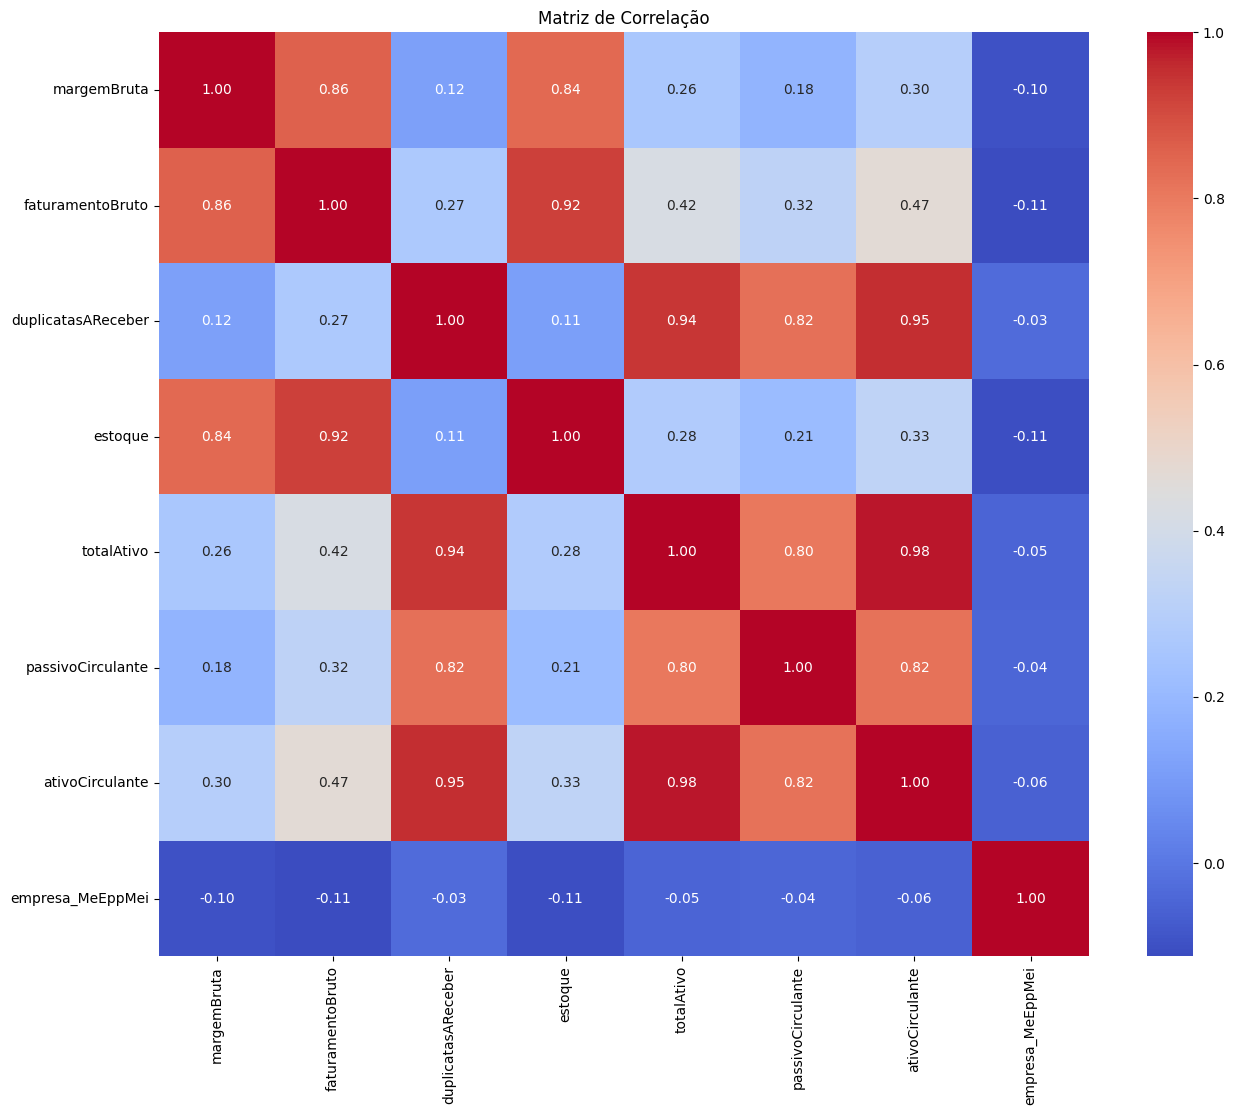

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [224]:
df = linhas_totalAtivo_margemBruta_faturamentoBruto.dropna()

In [225]:
df.shape

(8806, 8)

In [226]:
df.isnull().sum()

margemBruta           0
faturamentoBruto      0
duplicatasAReceber    0
estoque               0
totalAtivo            0
passivoCirculante     0
ativoCirculante       0
porte                 0
dtype: int64

In [228]:
X = df.drop(columns=["porte"])
y = df["porte"]

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Padronização dos dados
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [230]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [231]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [232]:
y_pred = rf.predict(X_test)

In [233]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Random Forest: {:.2f}".format(accuracy))

Acurácia do modelo Random Forest: 0.54


In [234]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [235]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [236]:
y_pred = gbm.predict(X_test)

In [237]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo Gradient Boosting: {:.2f}".format(accuracy))

Acurácia do modelo Gradient Boosting: 0.58


In [238]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [239]:
y_predicoes = lda.predict(X_test)

In [240]:
accuracy_score(y_true = y_test, y_pred = y_predicoes)

0.5999242997728993